In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

import seaborn as sns



class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

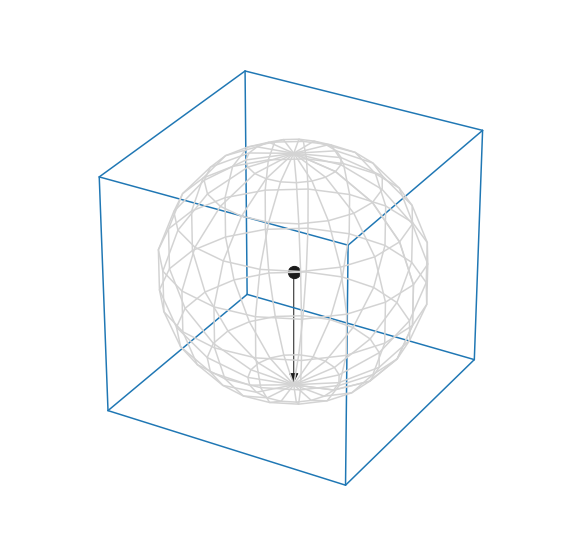

In [161]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (10,10)
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")


# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgray")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="tab:blue")

# draw a point
ax.scatter([0], [0], [0], color="k", s=150)
plt.axis('off')
a = Arrow3D([0, 0], [0, 0], [0, -1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
ax = plt.gca()
ax.set_facecolor('white')

fig.savefig("./hypersphere.svg", bbox_inches='tight')

In [207]:
sns.set(font_scale=1.1)

In [208]:
# Overfitting
cifar_10_e =  np.array([0, 10, 15, 25, 40, 50, 65, 85, 105, 127, 140, 150, 170, 190, 200])
cifar_10_r =  np.array([0, 81, 82, 85, 90, 90, 91, 91, 91.3, 91.9, 92.1, 92.2, 92.4, 92, 92])
cifar_10_ra = np.array([0, 24, 30, 34, 44, 45, 46, 47, 49, 51, 51, 50, 45, 43, 42])

cifar_100_r = np.array([0, 11, 20, 37, 45, 60, 69, 72, 72, 72, 72, 72, 72, 72, 73])
cifar_100_ra = np.array([0, 3, 4, 6, 10, 15, 20, 21, 21, 20, 20, 19, 15, 15, 15])

In [209]:
# plt.plot(cifar_10_e, cifar_10_ra)
# plt.plot(cifar_10_e, cifar_10_r)

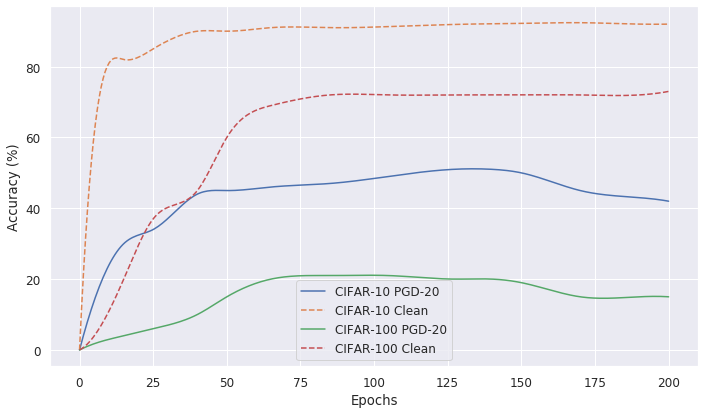

In [210]:
from scipy.interpolate import make_interp_spline, BSpline

def smooth(a, b, n=300):
    xnew = np.linspace(a.min(), a.max(), n) 
    spl = make_interp_spline(a, b, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth


T = cifar_10_e
power = cifar_10_ra

ep_r, rob_r = smooth(cifar_10_e, cifar_10_ra)
ep_r, n_r = smooth(cifar_10_e, cifar_10_r)

_, rob_r100 = smooth(cifar_10_e, cifar_100_ra)
_, n_r100 = smooth(cifar_10_e, cifar_100_r)

fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(ep_r, rob_r,'-') 
l2 = ax.plot(ep_r, n_r,'--') 

l3 = ax.plot(ep_r, rob_r100, '-')
l4 = ax.plot(ep_r, n_r100, '--')

ax.legend(labels = ('CIFAR-10 PGD-20', 'CIFAR-10 Clean', 'CIFAR-100 PGD-20', 'CIFAR-100 Clean')) # legend placed at lower right
# ax.set_title("Advertisement effect on sales")
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy (%)')
fig.show()
fig.savefig('overfit.pdf', bbox_inches='tight')

In [19]:
# Robustness curves

In [221]:
cifar_10_eps = [8., 9., 10., 11., 12., 13., 14., 15., 16.]
cifar_10_r20 = [51.3, 49.6, 46.7, 45.1, 42.7, 40.4, 38.7, 36.5, 34.8]

cifar_10_over = [56.1, 50.8, 45.6, 40.6, 36.3, 32.0, 27.7, 24.2, 20.9]

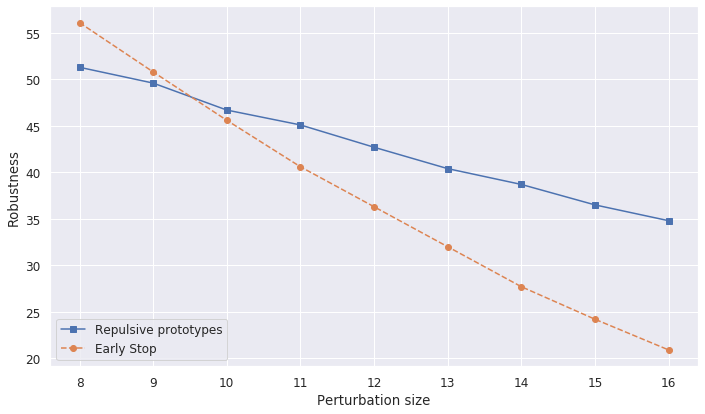

In [222]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(cifar_10_eps, cifar_10_r20,'s-') # solid line with yellow colour and square marker
l2 = ax.plot(cifar_10_eps, cifar_10_over,'o--') # dash line with green colour and circle marker
ax.legend(labels = ('Repulsive prototypes', 'Early Stop'), loc = 'lower left') # legend placed at lower right
# ax.set_title("Advertisement effect on sales")
ax.set_xlabel('Perturbation size')
ax.set_ylabel('Robustness')
fig.show()
fig.savefig('cifar10curve.pdf', bbox_inches='tight')

In [ ]:
# CIFAR-100

In [223]:
cifar_100_eps = [8., 9., 10., 11., 12., 13., 14., 15., 16.]
cifar_100_r20 = [20.6, 19.2, 17.8, 16.6, 15.5, 14.5, 13.2, 12.0, 10.9]

cifar_100_over = [28.1, 17.7, 14.9, 12.7, 10.9, 9.2, 8.0, 7.0, 5.4]

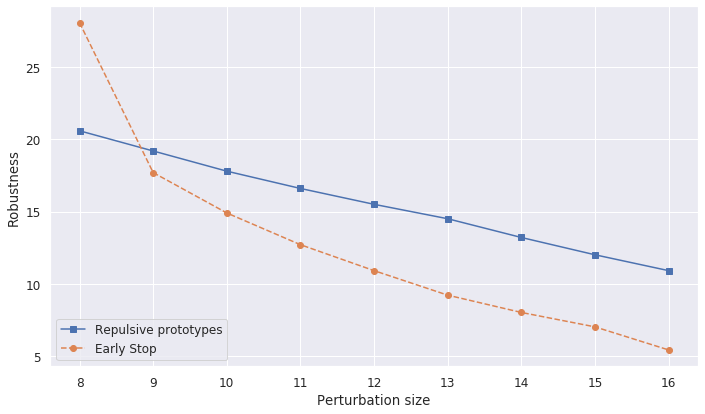

In [224]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(cifar_100_eps, cifar_100_r20,'s-') # solid line with yellow colour and square marker
l2 = ax.plot(cifar_100_eps, cifar_100_over,'o--') # dash line with green colour and circle marker
ax.legend(labels = ('Repulsive prototypes', 'Early Stop'), loc = 'lower left') # legend placed at lower right
# ax.set_title("Advertisement effect on sales")
ax.set_xlabel('Perturbation size')
ax.set_ylabel('Robustness')
fig.show()
fig.savefig('cifar100curve.pdf', bbox_inches='tight')